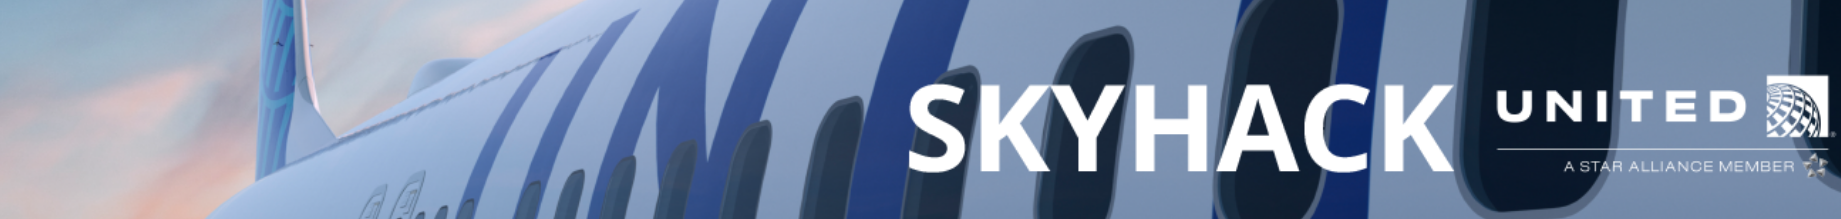

-------------------------------------------

# Customer Comments Analysis 
---------------------------------------------------------------------------------------------------


------------------------------------------------
----------------------------------------------

## 1. Reading and Loading the packages and Data

--------------------------------------------------------

In [304]:
## importing libraries and packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk.corpus import stopwords

In [423]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', 1000)

In [306]:
## loading the data

inventory_data = pd.read_csv("Datasets/Inflight Service_Inventory data.csv")
inventory_data.head() 

,flight_number,departure_station_code,arrival_station_code,scheduled_departure_dtl,entree_product_id,entree_description,entree_code,planned_entree_count,consumed_entree_count
0,2634,IAX,PDX,09-01-2022,58019,Belgium waffle,WF,20,32
1,2666,ORX,IAX,09-01-2022,60549,Vegetarian chili and polenta cake,V,3,0
2,2310,DEX,SAX,09-02-2022,58981,Scrambled eggs,O,9,7
3,1712,SFX,CLX,09-04-2022,58764,Mediterranean Falafel Bowl,V,1,0
4,1225,LAX,HNX,09-08-2022,60549,Vegetarian chili and polenta cake,V,1,0


In [307]:
##changing datatime columns

inventory_data['scheduled_departure_dtl'] = inventory_data['scheduled_departure_dtl'].astype('datetime64[ns]')
inventory_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61267 entries, 0 to 61266
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   flight_number            61267 non-null  int64         
 1   departure_station_code   61267 non-null  object        
 2   arrival_station_code     61267 non-null  object        
 3   scheduled_departure_dtl  61267 non-null  datetime64[ns]
 4   entree_product_id        61267 non-null  int64         
 5   entree_description       61267 non-null  object        
 6   entree_code              61267 non-null  object        
 7   planned_entree_count     61267 non-null  int64         
 8   consumed_entree_count    61267 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 4.2+ MB


In [308]:
## loading pre-order data

preorder_data = pd.read_csv("Datasets/Inflight Service_Pre order data.csv")
preorder_data.head() 

,flight_number,departure_station_code,arrival_station_code,record_locator,carrier_code,scheduled_departure_dtl,cabin_code,meal_group,meal_category,meal_short_description,meal_description,is_entree,pre_order_qty,Unnamed: 13,Unnamed: 14
0,1423,INX,DEX,B3XX1H,UA,09-01-2022,J,ENTREES HOT,POULTRY,"Za'atar chicken with spinach, roasted peppers, and orzo","Za'atar chicken with spinach, roasted peppers, and orzo",Y,1,NaN,NaN
1,1620,IAX,CUX,BFXXJC,UA,09-02-2022,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted red pepper sauce,Y,2,NaN,NaN
2,1852,ORX,PDX,DPXX2H,UA,09-02-2022,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted red pepper sauce,Y,1,NaN,NaN
3,548,IAX,SFX,ELXX8H,UA,09-02-2022,J,ENTREES HOT,BREAKFAST,Scrambled eggs,"Scrambled eggs with ham, onion and peppers",Y,2,NaN,NaN
4,1155,IAX,CUX,NCXX4S,UA,09-02-2022,J,ENTREES HOT,BREAKFAST,Belgium waffle,Belgium waffle with bourbon banana fosters sauce and berries,Y,2,NaN,NaN


In [309]:
##changing datatime columns

preorder_data['scheduled_departure_dtl'] = preorder_data['scheduled_departure_dtl'].astype('datetime64[ns]')
preorder_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212039 entries, 0 to 212038
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   flight_number            212039 non-null  int64         
 1   departure_station_code   212039 non-null  object        
 2   arrival_station_code     212039 non-null  object        
 3   record_locator           212039 non-null  object        
 4   carrier_code             212039 non-null  object        
 5   scheduled_departure_dtl  212039 non-null  datetime64[ns]
 6   cabin_code               212039 non-null  object        
 7   meal_group               191728 non-null  object        
 8   meal_category            191728 non-null  object        
 9   meal_short_description   212039 non-null  object        
 10  meal_description         137062 non-null  object        
 11  is_entree                191728 non-null  object        
 12  pre_order_qty   

In [310]:
preorder_data.drop(columns=['Unnamed: 13', 'Unnamed: 14'], inplace=True)

In [311]:
preorder_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212039 entries, 0 to 212038
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   flight_number            212039 non-null  int64         
 1   departure_station_code   212039 non-null  object        
 2   arrival_station_code     212039 non-null  object        
 3   record_locator           212039 non-null  object        
 4   carrier_code             212039 non-null  object        
 5   scheduled_departure_dtl  212039 non-null  datetime64[ns]
 6   cabin_code               212039 non-null  object        
 7   meal_group               191728 non-null  object        
 8   meal_category            191728 non-null  object        
 9   meal_short_description   212039 non-null  object        
 10  meal_description         137062 non-null  object        
 11  is_entree                191728 non-null  object        
 12  pre_order_qty   

In [312]:
## loading the service inventory data

inflight_satisfaction_score_data = pd.read_csv("Datasets/Survey data_Inflight Satisfaction Score.csv", encoding='cp1252')
inflight_satisfaction_score_data.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,arrival_delay_minutes,arrival_delay_group,cabin_code_desc,cabin_name,entity,number_of_legs,seat_factor_band,loyalty_program_level,generation,fleet_type_description,fleet_usage,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,09-01-2022,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,2,Dissatisfied,food & beverage,food and beverage satisfaction,-24,Early & Ontime,Economy,Economy,Domestic,2,80+,NaN,Gen X,CRJ-200,Express,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,09-01-2022,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,5,Satisfied,food & beverage,food and beverage satisfaction,10,Delayed,Business,NaN,Domestic,2,90+,premier platinum,Boomer,ERJ-175,Express,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,09-01-2022,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,5,Satisfied,food & beverage,food and beverage satisfaction,-8,Early & Ontime,Business,NaN,Domestic,2,90+,premier platinum,Gen X,ERJ-175,Express,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,09-01-2022,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,3,Dissatisfied,food & beverage,food and beverage satisfaction,-11,Early & Ontime,Economy,Economy,Domestic,3,90+,non-elite,Boomer,CRJ-200,Express,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,09-01-2022,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,5,Satisfied,food & beverage,food and beverage satisfaction,18,Delayed,Business,NaN,Domestic,2,90+,premier silver,Boomer,A319-100,Mainline,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure


In [313]:
### creating month columns --> datecolumn is object

inflight_satisfaction_score_data['scheduled_departure_date'] = inflight_satisfaction_score_data['scheduled_departure_date'].astype('datetime64[ns]')
inflight_satisfaction_score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34963 entries, 0 to 34962
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   flight_number                     34963 non-null  int64         
 1   origin_station_code               34963 non-null  object        
 2   destination_station_code          34963 non-null  object        
 3   record_locator                    34963 non-null  object        
 4   scheduled_departure_date          34963 non-null  datetime64[ns]
 5   question_text                     34963 non-null  object        
 6   score                             34963 non-null  int64         
 7   satisfaction_type                 34963 non-null  object        
 8   driver_sub_group1                 34963 non-null  object        
 9   driver_sub_group2                 34963 non-null  object        
 10  arrival_delay_minutes             34963 non-nu

In [314]:
## month column

inflight_satisfaction_score_data['departure_month'] = inflight_satisfaction_score_data['scheduled_departure_date'].dt.month
inflight_satisfaction_score_data.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,arrival_delay_minutes,arrival_delay_group,cabin_code_desc,cabin_name,entity,number_of_legs,seat_factor_band,loyalty_program_level,generation,fleet_type_description,fleet_usage,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke,departure_month
0,3802,MKX,ORX,CYXXJJ,2022-09-01,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,2,Dissatisfied,food & beverage,food and beverage satisfaction,-24,Early & Ontime,Economy,Economy,Domestic,2,80+,NaN,Gen X,CRJ-200,Express,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure,9
1,4645,COX,DEX,DRXXMH,2022-09-01,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,5,Satisfied,food & beverage,food and beverage satisfaction,10,Delayed,Business,NaN,Domestic,2,90+,premier platinum,Boomer,ERJ-175,Express,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure,9
2,5236,COX,DEX,DEXXS1,2022-09-01,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,5,Satisfied,food & beverage,food and beverage satisfaction,-8,Early & Ontime,Business,NaN,Domestic,2,90+,premier platinum,Gen X,ERJ-175,Express,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure,9
3,4686,DEX,COX,PXXXLH,2022-09-01,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,3,Dissatisfied,food & beverage,food and beverage satisfaction,-11,Early & Ontime,Economy,Economy,Domestic,3,90+,non-elite,Boomer,CRJ-200,Express,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure,9
4,671,DEX,COX,KZXXH5,2022-09-01,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,5,Satisfied,food & beverage,food and beverage satisfaction,18,Delayed,Business,NaN,Domestic,2,90+,premier silver,Boomer,A319-100,Mainline,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure,9


In [315]:
## loading customers comments data

customer_comments = pd.read_csv("Datasets/Survey data _Customer comments.csv", encoding='cp1252')
customer_comments.head() 

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,seat_factor_band,ques_verbatim_text,verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group
0,950,LHX,SFX,01-09-2022,Early & Ontime,Delayed,Atlantic,0 to 70,Is there anything else you'd like to share about the food & beverage served on your flight from ...,There was no salad dressing. The staff informed me that the flight did not receive any salad dre...,non-elite,B777-200,Mainline,member
1,950,LHX,SFX,01-09-2022,Early & Ontime,Delayed,Atlantic,0 to 70,Is there anything else you'd like to share about the food & beverage served on your flight from ...,Not a choice.,NaN,B777-200,Mainline,non-member
2,1876,FLX,EWX,01-09-2022,Early & Ontime,Early & Ontime,Domestic,90+,Is there anything else you'd like to share about the food & beverage served on your flight from ...,More variety and bigger snacks.,non-elite,A320-200,Mainline,member
3,5469,SFX,SEX,01-09-2022,Early & Ontime,Early & Ontime,Domestic,90+,Is there anything else you'd like to share about the food & beverage served on your flight from ...,"Serving pretzels and cookies in first class was extremely disappointing. Really, a little though...",premier gold,ERJ-175,Express,member
4,281,DEX,ANX,01-09-2022,Early & Ontime,Early & Ontime,Domestic,0 to 70,Is there anything else you'd like to share about the food & beverage served on your flight from ...,More inflight selections to purchase for full meals.,non-elite,B737-MAX8,Mainline,member


In [316]:
### creating month columns --> datecolumn is object

customer_comments['scheduled_departure_date'] = customer_comments['scheduled_departure_date'].astype('datetime64[ns]')
customer_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   flight_number             9424 non-null   int64         
 1   origin_station_code       9424 non-null   object        
 2   destination_station_code  9424 non-null   object        
 3   scheduled_departure_date  9424 non-null   datetime64[ns]
 4   arrival_delay_group       9424 non-null   object        
 5   departure_delay_group     9424 non-null   object        
 6   entity                    9424 non-null   object        
 7   seat_factor_band          9424 non-null   object        
 8   ques_verbatim_text        9424 non-null   object        
 9   verbatim_text             9424 non-null   object        
 10  loyalty_program_level     6920 non-null   object        
 11  fleet_type_description    9424 non-null   object        
 12  fleet_usage         

C:\Users\saiba\AppData\Local\Temp\ipykernel_3036\571469870.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_comments['scheduled_departure_date'] = customer_comments['scheduled_departure_date'].astype('datetime64[ns]')


In [317]:
# customer_comments['scheduled_departure_date']

-----------------------------------------------------------
----------------------------------------------------------

## 2. Merging the dataframes

In [318]:
'''
merging inflight_satisfaction_score_data, customer_comments on 
                              'flight_number', 'origin_station_code',
                              'destination_station_code', 'scheduled_departure_date' ----> Inner Join
'''

final_data_1 = pd.merge(inflight_satisfaction_score_data, customer_comments, 
                        on = ['flight_number', 'origin_station_code',
                              'destination_station_code', 'scheduled_departure_date'],
                        how = 'inner')

print("Shape of final_data_1 : ", final_data_1.shape)


'''
merging preorder_data with inventory_data, on 'flight_number', 'departure_station_code', 
                                               'arrival_station_code', 'scheduled_departure_dtl' -----> Inner Join
'''

final_data_2 = pd.merge(preorder_data, inventory_data,
                        left_on= ['flight_number', 'departure_station_code', 'arrival_station_code',
                                   'scheduled_departure_dtl', 'meal_short_description'],
                        right_on = ['flight_number', 'departure_station_code', 'arrival_station_code',
                                   'scheduled_departure_dtl', 'entree_description'],
                        how = 'inner')

final_data_2.dropna(subset=['meal_description'], inplace = True)

print("Shape of final_data_2 : ", final_data_2.shape)

'''
merging final_data_1 with final_data_2, left_on, 'flight_number', 'origin_station_code',
                              'destination_station_code', 'scheduled_departure_date'
                              and right_on, 'flight_number', 'departure_station_code', 'arrival_station_code',
                                   'scheduled_departure_dtl' --------> Inner Join
'''

final_data = pd.merge(final_data_1, final_data_2, 
                      left_on = ['flight_number', 'origin_station_code',
                              'destination_station_code', 'scheduled_departure_date'],
                      right_on= ['flight_number', 'departure_station_code', 'arrival_station_code',
                                   'scheduled_departure_dtl'],
                        how = 'inner')

print("Final Data shape : ", final_data.shape)

Shape of final_data_1 :  (10372, 42)
Shape of final_data_2 :  (52908, 18)
Final Data shape :  (5170, 59)


In [319]:
## checking the datetime column values
final_data.columns

Index(['flight_number', 'origin_station_code', 'destination_station_code',
       'record_locator_x', 'scheduled_departure_date', 'question_text',
       'score', 'satisfaction_type', 'driver_sub_group1', 'driver_sub_group2',
       'arrival_delay_minutes', 'arrival_delay_group_x', 'cabin_code_desc',
       'cabin_name', 'entity_x', 'number_of_legs', 'seat_factor_band_x',
       'loyalty_program_level_x', 'generation', 'fleet_type_description_x',
       'fleet_usage_x', 'equipment_type_code', 'ua_uax', 'actual_flown_miles',
       'haul_type', 'departure_gate', 'arrival_gate',
       'international_domestic_indicator', 'response_group_x',
       'media_provider', 'hub_spoke', 'departure_month',
       'arrival_delay_group_y', 'departure_delay_group', 'entity_y',
       'seat_factor_band_y', 'ques_verbatim_text', 'verbatim_text',
       'loyalty_program_level_y', 'fleet_type_description_y', 'fleet_usage_y',
       'response_group_y', 'departure_station_code', 'arrival_station_code',
   

## 3. Extracting imp Columns only

In [320]:
'''
Extracting important columns
'''

imp_cols = ['flight_number', 'origin_station_code', 'destination_station_code',
            'scheduled_departure_date', 'question_text', 'score', 'satisfaction_type',
            'number_of_legs', 'driver_sub_group1', 'driver_sub_group2', 'generation',
            'ua_uax', 'actual_flown_miles', 'haul_type', 'international_domestic_indicator',
            'ques_verbatim_text', 'verbatim_text','meal_group', 'meal_category', 'meal_short_description',
            'pre_order_qty', 'planned_entree_count','consumed_entree_count']

len(imp_cols)

23

In [321]:
## checking variety of questions avaliable

final_data['ques_verbatim_text'].value_counts()

Is there anything else you'd like to share about the food & beverage served on your flight from [CITY] to [CITY]?    5170
Name: ques_verbatim_text, dtype: int64

In [322]:
## setting our final data for analysis

data = final_data[imp_cols]

In [323]:
## checking shape

data.shape 

(5170, 23)

In [324]:
data.columns

Index(['flight_number', 'origin_station_code', 'destination_station_code',
       'scheduled_departure_date', 'question_text', 'score',
       'satisfaction_type', 'number_of_legs', 'driver_sub_group1',
       'driver_sub_group2', 'generation', 'ua_uax', 'actual_flown_miles',
       'haul_type', 'international_domestic_indicator', 'ques_verbatim_text',
       'verbatim_text', 'meal_group', 'meal_category',
       'meal_short_description', 'pre_order_qty', 'planned_entree_count',
       'consumed_entree_count'],
      dtype='object')

## 3.1 Saving the data for future usecase

In [325]:
data.to_csv("Datasets/clean_final_data.csv")

## 3.2 % inflight Satisfaction Score

In [462]:
perct_inflight_satisfaction_score = data['satisfaction_type'].value_counts(normalize = True)

In [464]:
perct_inflight_satisfaction_score * 100.0

Satisfied       56.499033
Dissatisfied    43.500967
Name: satisfaction_type, dtype: float64

------------------------------------------------------------------------
-------------------------------------------------------------------------
## 4. Analysis of comments 
--------------------------------------------------------------------------
--------------------------------------------------------------------------

In [326]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Download the NLTK stopwords if you haven't already
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

## list of all words
list_of_words_before_stemming = []
list_of_words_after_stemming = []

# Define a function to process sentences
def process_sentence(sentence):
    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Define a list of English stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)

    # Remove stopwords and punctuation
    filtered_words_before_stemming = [word for word in words if word.lower() not in stop_words and word not in punctuation]
    
    #stemming and removing stopwords and punctuations
    filtered_words_after_stemming = [stemmer.stem(word) for word in words if word.lower() not in stop_words and word not in punctuation]
    
    ## storing all words for furthur use
    list_of_words_after_stemming.extend(filtered_words_after_stemming)
    
    ## storing all words for furthur use
    list_of_words_before_stemming.extend(filtered_words_before_stemming)
    
    # Join the filtered words back into a sentence
    filtered_sentence = ' '.join(filtered_words_after_stemming)

    return filtered_sentence

# summer_comments['verbatim_filter_text'] = []
## storing all comments after stemming and cleaning
filtered_sentence = []

# Process each sentence
for sentence in data['verbatim_text']:
    filter_sentence = process_sentence(sentence)
#     summer_comments['verbatim_filter_text'].append(filtered_sentence)
    filtered_sentence.append(filter_sentence)
    
    
## Now, remove duplicates from filtered_sentence
updated_filtered_sentence = list(set(filtered_sentence))

# Print the unique filtered sentences
# for sentence in filtered_sentence:
#     print(sentence)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saiba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [327]:
##checking the results

len(list_of_words_before_stemming), len(list_of_words_after_stemming), len(filtered_sentence), len(updated_filtered_sentence)

(41327, 41327, 5170, 754)

In [328]:
# updated_filtered_sentence 

In [329]:
# list_of_words_before_stemming

In [349]:
### creating new columns with the filtered text/comments

data.loc[:, 'verbatim_filtered_text'] = filtered_sentence
 


C:\Users\saiba\AppData\Local\Temp\ipykernel_3036\563143589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'verbatim_filtered_text'] = filtered_sentence


## 5. Extracting keywords

In [330]:
'''
keywords are those, found in previous results
like meal_category, meal_group, entree_description
'''


## loading multiple data files

business_class_dishes_with_good_perct_consumption = pd.read_csv("Datasets/business_class_dishes_with_good_perct_consumption.csv")
business_class_dishes_with_good_perct_consumption

# second file
business_economy_meal_data = pd.read_csv("Datasets/business_economy_meal_data.csv")
business_economy_meal_data

# ## third file
economy_best_meal_group_entree_category = pd.read_csv("Datasets/economy_best_meal_group_entree_category.csv")
economy_best_meal_group_entree_category 

,meal_group,meal_category,is_entree,pre_order_qty
0,ALCOHOL BEVERAGES,GENERIC INT WINE A,N,3056
1,BEER,BEER,N,2383
2,ENTREES COLD,CHEESE,Y,2737
3,ENTREES COLD,VARIETY,Y,53
4,ENTREES HOT,BREAKFAST,Y,69690
5,ENTREES HOT,POULTRY,Y,54255
6,ENTREES HOT,VEGETARIAN,Y,37625
7,ENTREES HOT,BEEF/VEAL,Y,36035
8,ENTREES HOT,PASTA,Y,1100
9,ENTREES HOT,SEAFOOD,Y,589


In [331]:
## extracting keywords and storing them into a set, so that no duplicate is allowed

keywords = set(list(business_class_dishes_with_good_perct_consumption['entree_description']) +
           list(economy_best_meal_group_entree_category['meal_category']) +
           list(economy_best_meal_group_entree_category['meal_group']))
len(keywords)

32

In [332]:
keywords

{'ALCOHOL BEVERAGES',
 'BEEF/VEAL',
 'BEER',
 'BREAKFAST',
 'CHEESE',
 'Chicken breast entree',
 'Classic selection cheese tray',
 'DINNER',
 'ENT, BREAKFAST LIGHT REFRESHMENT',
 'ENTREES COLD',
 'ENTREES HOT',
 'GENERIC INT WINE A',
 'LAMB',
 'LIQUOR',
 'PASTA',
 'PORK',
 'POULTRY',
 'Protein egg entree',
 'SANDWICH',
 'SANDWICHES',
 'SEAFOOD',
 'SNACKS',
 'Scrambled eggs',
 'Seared beef short rib',
 'Tapas',
 'Teriyaki chicken',
 'UNITED CATERER OWNED 88-3F',
 'VARIETY',
 'VEGETABLE',
 'VEGETARIAN',
 'Vegetarian entree',
 'Zatar chicken'}

In [333]:
## counting of tera-grams

# Generate trigrams from the list of words
teragrams = list(ngrams(list_of_words_before_stemming, 4)) 

# Count the occurrences of each teragram that contains a keyword
teragram_counts = Counter(teragram for teragram in teragrams if any(str.lower(keyword) in teragram for keyword in keywords))

# Sort the teragram counts in descending order
sorted_teragram_counts = sorted(teragram_counts.items(), key=lambda x: x[1], reverse=True)

# # Calculate the total number of trigrams
# total_teragrams = len(teragrams)

# # Calculate the percentile threshold (e.g., 50% of the total trigrams)
# percentile_threshold = total_teragrams * 0.10

# # Initialize variables for accumulating trigrams
# accumulated_teragrams = []
# accumulated_count = 0

# # Iterate through sorted trigram counts until reaching the percentile threshold
# for teragram, count in sorted_teragram_counts:
#     accumulated_trigrams.append((teragram, count))
#     accumulated_count += count
#     if accumulated_count >= percentile_threshold:
#         break

# Print the top 50 percentile teragrams and their counts
for teragram, count in sorted_teragram_counts[:100]:
    print(f'{teragram} : {count}') 

('Vegetables', 'salad', 'good', 'snacks') : 36
('salad', 'good', 'snacks', 'served') : 36
('good', 'snacks', 'served', 'would') : 36
('snacks', 'served', 'would', 'nice') : 36
('options', 'like', 'cold', 'sandwich') : 30
('like', 'cold', 'sandwich', 'fruit') : 30
('cold', 'sandwich', 'fruit', 'bowl') : 30
('sandwich', 'fruit', 'bowl', 'hot') : 30
('fruit', 'bowl', 'hot', 'sandwiches') : 30
('bowl', 'hot', 'sandwiches', 'hot') : 30
('hot', 'sandwiches', 'hot', 'mess') : 30
('sandwiches', 'hot', 'mess', 'cheese') : 30
('hot', 'mess', 'cheese', 'platter') : 30
('mess', 'cheese', 'platter', 'would') : 30
('cheese', 'platter', 'would', 'better') : 30
('would', 'better', '1/2', 'cheese') : 30
('better', '1/2', 'cheese', '1/2') : 30
('1/2', 'cheese', '1/2', 'fruit') : 30
('cheese', '1/2', 'fruit', 'would') : 29
('prefer', 'low', 'calorie', 'snacks') : 26
('low', 'calorie', 'snacks', 'prefer') : 25
('calorie', 'snacks', 'prefer', 'low') : 25
('snacks', 'prefer', 'low', 'calorie') : 25
('think'

In [334]:
# trigram_counts

In [335]:
# sorted_trigram_counts

In [336]:
## counting of tri-grams

# Generate trigrams from the list of words
trigrams = list(ngrams(list_of_words_after_stemming, 3)) 

# Count the occurrences of each teragram that contains a keyword
trigram_counts = Counter(trigram for trigram in trigrams if any(str.lower(keyword) in trigram for keyword in keywords))

# Sort the teragram counts in descending order
sorted_trigram_counts = sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)

# # Calculate the total number of trigrams
# total_teragrams = len(teragrams)

# # Calculate the percentile threshold (e.g., 50% of the total trigrams)
# percentile_threshold = total_teragrams * 0.10

# # Initialize variables for accumulating trigrams
# accumulated_teragrams = []
# accumulated_count = 0

# # Iterate through sorted trigram counts until reaching the percentile threshold
# for teragram, count in sorted_teragram_counts:
#     accumulated_trigrams.append((teragram, count))
#     accumulated_count += count
#     if accumulated_count >= percentile_threshold:
#         break

# Print the top 50 percentile teragrams and their counts
for trigram, count in sorted_trigram_counts[:100]:
    print(f'{trigram} : {count}')  

('like', 'cold', 'sandwich') : 30
('cold', 'sandwich', 'fruit') : 30
('sandwich', 'fruit', 'bowl') : 30
('bowl', 'hot', 'sandwich') : 30
('hot', 'sandwich', 'hot') : 30
('sandwich', 'hot', 'mess') : 30
('morn', 'breakfast', 'select') : 22
('breakfast', 'select', 'gotten') : 22
('plane', 'morn', 'breakfast') : 21
('pre', 'order', 'breakfast') : 16
('order', 'breakfast', 'inform') : 16
('breakfast', 'inform', 'select') : 16
('said', 'everyth', 'vegetarian') : 15
('everyth', 'vegetarian', 'option') : 15
('vegetarian', 'option', 'longer') : 15
('flyer', 'buy', 'sandwich') : 15
('buy', 'sandwich', 'airport') : 15
('sandwich', 'airport', 'carri') : 15
('hard', 'pre-mad', 'breakfast') : 14
('pre-mad', 'breakfast', 'think') : 14
('breakfast', 'think', 'get') : 14
('white', 'kale', 'breakfast') : 13
('kale', 'breakfast', 'amaz') : 13
('breakfast', 'amaz', 'pleas') : 13
('flight', 'purchas', 'sandwich') : 10
('purchas', 'sandwich', 'flight') : 10
('sandwich', 'flight', 'check') : 10
('ahead', 'b

### 5.1 Count of words

In [416]:
## importing packages
from collections import Counter

##counting occurance of every words
word_counts = Counter(list_of_words_before_stemming)

# Sort the word counts in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Calculate the total number of words
total_words = len(list_of_words_before_stemming)

# Calculate the percentile threshold (e.g., 50% of the total words)
percentile_threshold = total_words * 0.5

# Initialize variables for accumulating words
accumulated_words = []
accumulated_count = 0

# Iterate through sorted word counts until reaching the percentile threshold
for word, count in sorted_word_counts:
    accumulated_words.append((word, count))
    accumulated_count += count
    if accumulated_count >= percentile_threshold:
        break

# Print the top 50 percentile words and their counts
for word, count in accumulated_words[:50]:
    print(f'{word}: {count}')

flight: 915
food: 769
would: 767
good: 498
snack: 444
meal: 401
options: 398
snacks: 379
offered: 348
like: 346
nice: 272
option: 265
get: 246
flights: 240
better: 237
time: 233
available: 226
class: 223
United: 213
choices: 202
served: 181
first: 171
breakfast: 169
cookie: 165
one: 165
offer: 160
attendant: 159
choice: 157
hour: 156
fruit: 155
pretzels: 151
cookies: 150
selection: 150
great: 149
could: 141
purchase: 139
something: 137
water: 137
two: 136
pre: 134
tried: 133
see: 129
quality: 128
5: 127
healthy: 122
got: 120
variety: 120
taste: 119
hot: 119
beverage: 118


## 6. WordCloud

In [417]:
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

# comment = "This is a customer comment with some keywords."

satisfied_token = []

## considering only satisfied comments
# satisfied_reviews = summer_comments[summer_comments['satisfaction_type'] == 'Satisfied']['verbatim_filter_text']
satisfied_reviews = data[data['satisfaction_type'] == 'Satisfied']['verbatim_text']


for comment in satisfied_reviews:
#     print(comment)
    tokens = word_tokenize(comment)
    satisfied_token.extend(tokens)
    
'''
use the extend method to add individual tokens to the satisfied_token list, 
and then we use join to concatenate all tokens into a single string, which is then used to generate the word cloud.'''


## Convert the list of tokens to a single string
satisfied_text = ' '.join(satisfied_token)

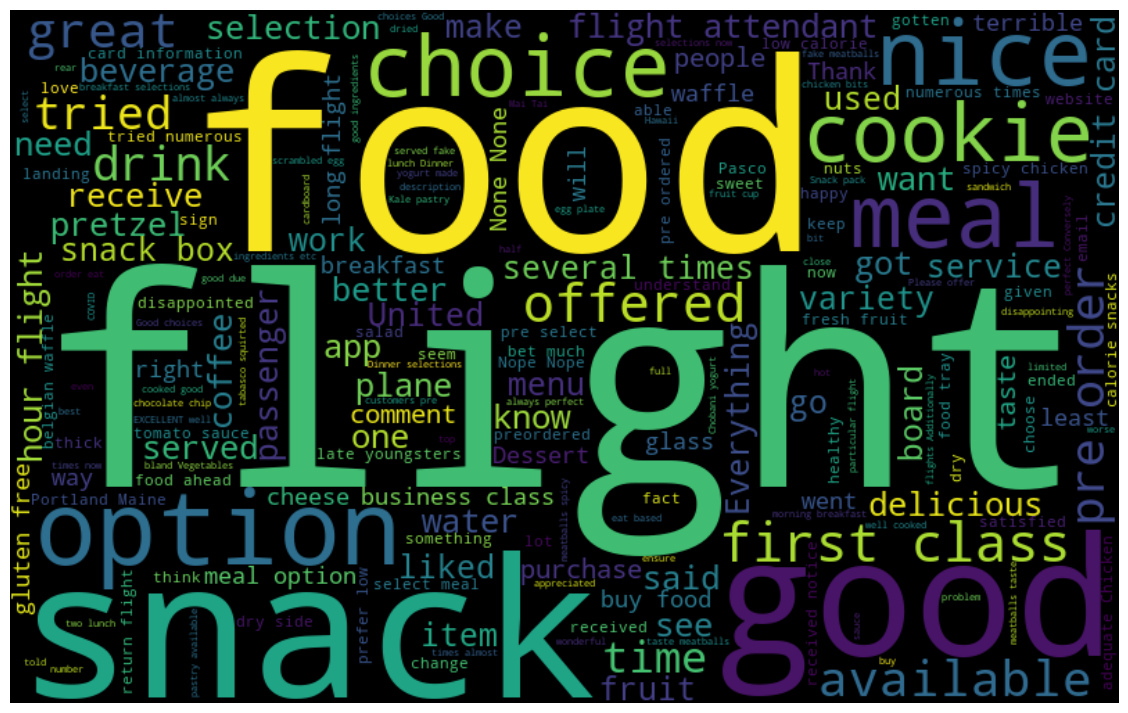

In [420]:
## plotting word cloud for satisfied tokens

wordcloud = WordCloud(width = 800, height= 500, 
                      background_color='black').generate(satisfied_text)

# Plot the word cloud
plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

In [421]:
## dissatisfied token creating

from nltk.tokenize import word_tokenize

dissatisfied_token = []

## cosnidering only dissatisfied comments
# dissatisfied_reviews = summer_comments[summer_comments['satisfaction_type'] == 'Dissatisfied']['verbatim_filter_text']
dissatisfied_reviews = data[data['satisfaction_type'] == 'Dissatisfied']['verbatim_text']

for comment in dissatisfied_reviews:
    tokens = word_tokenize(comment)
    dissatisfied_token.extend(tokens) 
    
    
'''
use the extend method to add individual tokens to the satisfied_token list, 
and then we use join to concatenate all tokens into a single string, which is then used to generate the word cloud.'''


## Convert the list of tokens to a single string
dissatisfied_text = ' '.join(dissatisfied_token)

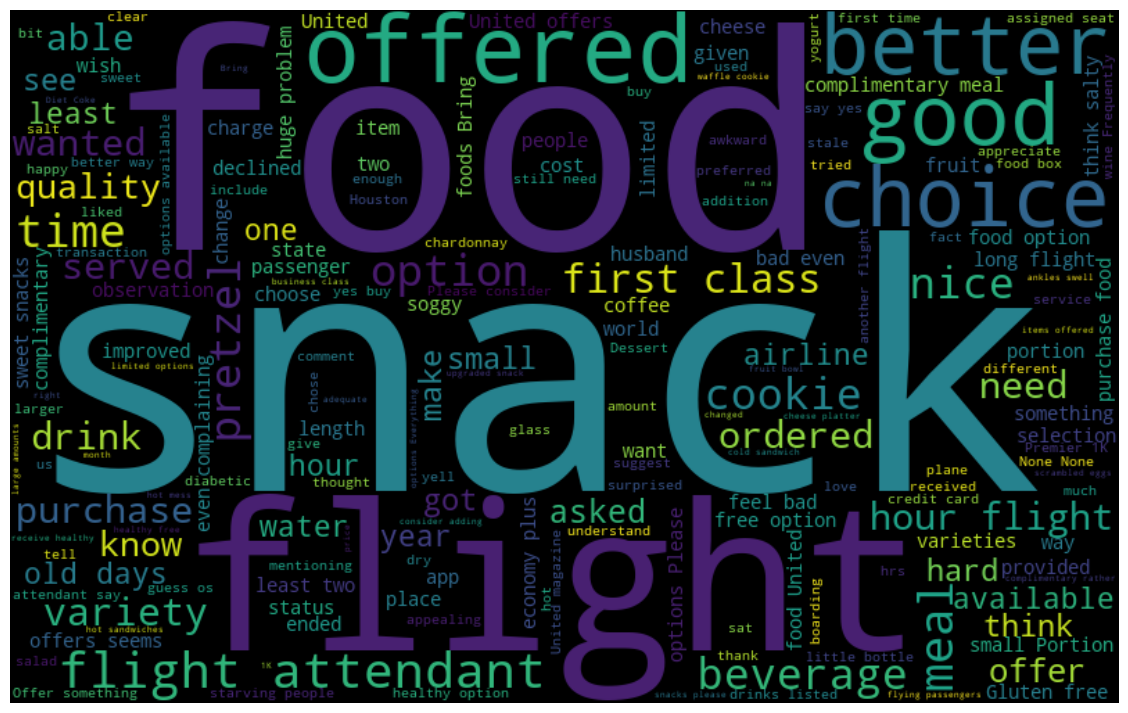

In [422]:
## plotting word cloud for satisfied tokens

wordcloud = WordCloud(width = 800, height= 500, 
                      background_color='black').generate(dissatisfied_text)

# Plot the word cloud
plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

## 6. Extracting Comments

----------------------------------------------------------------------------
---------------------------------------------------------------------------

## 6.1 Extracting only those comments where one or multiple keyword is/are present

In [382]:
# Define a custom function to check if any keyword is present

def finding_keywords(review):
    return any(keyword.lower() in review.lower() for keyword in keywords)


## applying the customer function to the data available 
msk = data['verbatim_text'].apply(finding_keywords)

## Use the mask to extract rows with keywords
filter_data = data[msk]

# Display the filter DataFrame
filter_data

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,question_text,score,satisfaction_type,number_of_legs,driver_sub_group1,driver_sub_group2,generation,ua_uax,actual_flown_miles,haul_type,international_domestic_indicator,ques_verbatim_text,verbatim_text,meal_group,meal_category,meal_short_description,pre_order_qty,planned_entree_count,consumed_entree_count,verbatim_filtered_text
11,2154,DEX,SNX,2022-09-09,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,5,Satisfied,2,food & beverage,food and beverage satisfaction,Boomer,UA,846,Medium,Domestic,Is there anything else you'd like to share about the food & beverage served on your flight from ...,Having vegetarian/vegan options is a huge step up and MUCH APPRECIATED!!.,ENTREES HOT,VEGETARIAN,Mediterranean Falafel Bowl,2,2,0,vegetarian/vegan option huge step much appreci
12,2154,DEX,SNX,2022-09-09,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,5,Satisfied,2,food & beverage,food and beverage satisfaction,Boomer,UA,846,Medium,Domestic,Is there anything else you'd like to share about the food & beverage served on your flight from ...,Having vegetarian/vegan options is a huge step up and MUCH APPRECIATED!!.,ENTREES HOT,VEGETARIAN,Mediterranean Falafel Bowl,1,2,0,vegetarian/vegan option huge step much appreci
49,1990,IAX,ORX,2022-09-09,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,4,Satisfied,2,food & beverage,food and beverage satisfaction,Gen X,UA,925,Medium,Domestic,Is there anything else you'd like to share about the food & beverage served on your flight from ...,Sandwiches.,ENTREES HOT,VEGETARIAN,Mediterranean Falafel Bowl,1,3,0,sandwich
50,1990,IAX,ORX,2022-09-09,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,4,Satisfied,2,food & beverage,food and beverage satisfaction,Gen X,UA,925,Medium,Domestic,Is there anything else you'd like to share about the food & beverage served on your flight from ...,Sandwiches.,ENTREES HOT,VEGETARIAN,Mediterranean Falafel Bowl,2,3,0,sandwich
51,1990,IAX,ORX,2022-09-09,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,4,Satisfied,2,food & beverage,food and beverage satisfaction,Gen X,UA,925,Medium,Domestic,Is there anything else you'd like to share about the food & beverage served on your flight from ...,Sandwiches.,ENTREES HOT,VEGETARIAN,Mediterranean Falafel Bowl,1,3,0,sandwich
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,1112,SFX,LIX,2022-09-30,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,3,Dissatisfied,1,food & beverage,food and beverage satisfaction,Boomer,UA,2447,Medium,Domestic,Is there anything else you'd like to share about the food & beverage served on your flight from ...,Would have preferred a lunch rather than a late breakfast. We saved some yogurt from our meal to...,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,1,16,7,would prefer lunch rather late breakfast save yogurt meal eat later knew would hungri
5157,1112,SFX,LIX,2022-09-30,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,3,Dissatisfied,1,food & beverage,food and beverage satisfaction,Boomer,UA,2447,Medium,Domestic,Is there anything else you'd like to share about the food & beverage served on your flight from ...,Would have preferred a lunch rather than a late breakfast. We saved some yogurt from our meal to...,ENTREES HOT,BREAKFAST,Horchata steel cut oatmeal,2,4,0,would prefer lunch rather late breakfast save yogurt meal eat later knew would hungri
5158,1112,SFX,LIX,2022-09-30,How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?,3,Dissatisfied,1,food & beverage,food and beverage satisfaction,Boomer,UA,2447,Medium,Domestic,Is there anythi

In [356]:
# data.columns

## 6.2 Analysing the comments for individual `meal_group` and `meal_category`

In [383]:
## subtracting the needed columns

filter_data[['meal_group', 'meal_category']].value_counts()

meal_group                  meal_category
ENTREES HOT                 BREAKFAST        438
                            BEEF/VEAL        273
                            POULTRY           92
                            VEGETARIAN        44
ENTREES COLD                CHEESE            21
UNITED CATERER OWNED 88-3F  SNACKS            17
ENTREES HOT                 PASTA             12
dtype: int64

In [403]:
## filtering only ENTREES HOT data

unique_dissatisfied_entrees_hot_data = filter_data[(filter_data['meal_group'] == 'ENTREES HOT') & (filter_data['satisfaction_type'] == 'Dissatisfied')][['satisfaction_type', 'verbatim_text','verbatim_filtered_text']].drop_duplicates()
unique_dissatisfied_entrees_hot_data


,satisfaction_type,verbatim_text,verbatim_filtered_text
78,Dissatisfied,Variety is limited. I do not purchase any good because of that reason. I will eat at the airport...,varieti limit purchas good reason eat airport board bring food
192,Dissatisfied,better selection of snacks.... not everyone eat cookies and pretzels.,better select snack .... everyon eat cooki pretzel
207,Dissatisfied,"Not a huge problem, I just think salty and sweet snacks should be offered at the same time…I fee...",huge problem think salti sweet snack offer time…i feel bad even complain starv peopl world
376,Dissatisfied,More variety of snacks would be great.,varieti snack would great
436,Dissatisfied,Jet Blue gives more snacks and bigger selection They Give at least 2/3 per flyer and better brands.,jet blue give snack bigger select give least 2/3 per flyer better brand
440,Dissatisfied,A little bit more snacks is better.,littl bit snack better
464,Dissatisfied,Unfortunately no snacks at all or food offered.,unfortun snack food offer
475,Dissatisfied,Payed for a 1st class ticket ordered a scrambled eggs breakfast on the way down no problem on th...,pay 1st class ticket order scrambl egg breakfast way problem way back told egg left 3f told scra...
495,Dissatisfied,More variety.,varieti
512,Dissatisfied,The for sale packages have not changed in months. Some greater variety would be desirable.,sale packag chang month greater varieti would desir


In [442]:
'''
Using Rake, trying to extract important key words
'''
from rake_nltk import Rake  
rake = Rake()

list_of_entrees_hot_words = []


for comment in unique_dissatisfied_entrees_hot_data['verbatim_text']:
    rake.extract_keywords_from_text(comment)
#     print(comment)
    for rating, keywords in rake.get_ranked_phrases_with_scores():
        if rating < 5:
#             print(keywords)
            list_of_entrees_hot_words.append(keywords)
#     print(rake.get_ranked_phrases_with_scores()) 

In [443]:
## sorting all negative key words to find the most concerned words and emotions behind it

word_counts = Counter(list_of_entrees_hot_words)
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
sorted_word_counts

[('wish', 3),
 ('variety', 2),
 ('would expect', 1),
 ('larger variety', 1),
 ('something little', 1),
 ('snacks', 1),
 ('purchase', 1),
 ('healthy', 1),
 ('chicken dish', 1),
 ('vegetarian', 1),
 ('selections', 1),
 ('choice', 1),
 ('options', 1),
 ('please ….', 1),
 ('morning flights', 1),
 ('gross eggs', 1),
 ('french toast', 1),
 ('could get', 1),
 ('time', 1),
 ('people order', 1),
 ('virgin', 1),
 ('seats', 1),
 ('little', 1),
 ('desired', 1),
 ('choices', 1),
 ('also', 1),
 ('breakfast would', 1),
 ('better without', 1),
 ('unattractive', 1),
 ('tasteless', 1),
 ('except', 1),
 ('difficult', 1),
 ('cheddar', 1),
 ('came', 1),
 ('sandwich', 1),
 ('provided', 1),
 ('least', 1)]

In [429]:
## filtering only UNITED CATERER OWNED 88-3F data

unique_dissatisfied_snacks_data = filter_data[(filter_data['meal_group'] == 'UNITED CATERER OWNED 88-3F')   & (filter_data['satisfaction_type'] == 'Dissatisfied')][['satisfaction_type', 'verbatim_text','verbatim_filtered_text']].drop_duplicates()
unique_dissatisfied_snacks_data

,satisfaction_type,verbatim_text,verbatim_filtered_text
1219,Dissatisfied,I would expect a larger variety on a 5 hour flight.,would expect larger varieti 5 hour flight
1620,Dissatisfied,More selections. Only a choice of a chicken dish or vegetarian.,select choic chicken dish vegetarian
1945,Dissatisfied,More variety or options.,varieti option
1946,Dissatisfied,If only United would offer something other than traditional breakfast food on morning flights. There was a time when you could get a deli plate rather than gross eggs or french toast. Please….,unit would offer someth tradit breakfast food morn flight time could get deli plate rather gross egg french toast please…
1954,Dissatisfied,"Wish you had a little more variety on choices. Also on a cross country flight, I wish you offered food twice. Or do what virgin did and just have people order from their seats as desired.",wish littl varieti choic also cross countri flight wish offer food twice virgin peopl order seat desir
5163,Dissatisfied,I wish at least a sandwich was provided.,wish least sandwich provid


In [446]:
'''
Using Rake, trying to extract important key words
'''
from rake_nltk import Rake  
rake = Rake()

list_of_snacks_words = []


for comment in unique_dissatisfied_snacks_data['verbatim_text']:
    rake.extract_keywords_from_text(comment)
#     print(comment)
    for rating, keywords in rake.get_ranked_phrases_with_scores():
        if rating < 5:
#             print(keywords)
            list_of_snacks_words.append(keywords)
#     print(rake.get_ranked_phrases_with_scores()) 

In [447]:
## sorting all negative key words to find the most concerned words and emotions behind it

word_counts = Counter(list_of_snacks_words) 
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
sorted_word_counts

[('something little', 1),
 ('snacks', 1),
 ('purchase', 1),
 ('healthy', 1),
 ('breakfast would', 1),
 ('better without', 1),
 ('unattractive', 1),
 ('tasteless', 1),
 ('except', 1),
 ('difficult', 1),
 ('cheddar', 1),
 ('came', 1)]

In [448]:
## filtering only ENTREES COLD data

unique_dissatisfied_entrees_cold_data = filter_data[(filter_data['meal_group'] == 'ENTREES COLD')   & (filter_data['satisfaction_type'] == 'Dissatisfied')][['satisfaction_type', 'verbatim_text','verbatim_filtered_text']].drop_duplicates()
unique_dissatisfied_entrees_cold_data 

,satisfaction_type,verbatim_text,verbatim_filtered_text
1294,Dissatisfied,Something little more healthy in snacks to purchase.,someth littl healthi snack purchas
4039,Dissatisfied,"Cheese plate offered only three small pieces of cheddar, all tasteless and came in a most unattractive and difficult to open plastic package. The breakfast would have been better without it. Except that Corn Flakes taste like styrofoam.",chees plate offer three small piec cheddar tasteless came unattract difficult open plastic packag breakfast would better without except corn flake tast like styrofoam


In [449]:
'''
Using Rake, trying to extract important key words
'''
from rake_nltk import Rake  
rake = Rake()

list_of_entrees_cold_words = []


for comment in unique_dissatisfied_entrees_cold_data['verbatim_text']:
    rake.extract_keywords_from_text(comment)
#     print(comment)
    for rating, keywords in rake.get_ranked_phrases_with_scores():
        if rating < 5:
#             print(keywords)
            list_of_entrees_cold_words.append(keywords)
#     print(rake.get_ranked_phrases_with_scores()) 

In [450]:
## sorting all negative key words to find the most concerned words and emotions behind it

word_counts = Counter(list_of_entrees_cold_words) 
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
sorted_word_counts

[('something little', 1),
 ('snacks', 1),
 ('purchase', 1),
 ('healthy', 1),
 ('breakfast would', 1),
 ('better without', 1),
 ('unattractive', 1),
 ('tasteless', 1),
 ('except', 1),
 ('difficult', 1),
 ('cheddar', 1),
 ('came', 1)]